In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%run ./scripts/util_func.py

In [2]:
# import data to dataframe

data = pd.read_csv("/home/dominic/Documents/publications/sensors2021/offline_model_training/powertrain_dynamics_IPEM/data/data.csv") 

data = data.iloc[1:]

print(data)

       Unnamed: 0      ros_time  wheel_meas_index  cmd_left_vel  \
1               1  1.603301e+18               0.0           0.0   
2               2  1.603301e+18               0.0           0.0   
3               3  1.603301e+18               0.0           0.0   
4               4  1.603301e+18               0.0           0.0   
5               5  1.603301e+18               0.0           0.0   
...           ...           ...               ...           ...   
17290       17290  1.603301e+18            3365.0           0.0   
17291       17291  1.603301e+18            3365.0           0.0   
17292       17292  1.603301e+18            3366.0           0.0   
17293       17293  1.603301e+18            3366.0           0.0   
17294       17294  1.603301e+18            3366.0           0.0   

       meas_left_vel  cmd_right_vel  meas_right_vel  
1            0.00000            0.0        0.000000  
2            0.00000            0.0        0.000000  
3            0.00000            0

In [3]:
# convert dataframe to numpy array

array = data.to_numpy()
array =np.delete(array,[0],axis=0)

time_arr = array[:,1]
time_arr = (time_arr - time_arr[0]) * 10**(-9)
meas_index_arr = array[:,2]

left_vel_cmd_arr = array[:,3]
left_vel_meas_arr = array[:,4]
right_vel_cmd_arr = array[:,5]
right_vel_meas_arr = array[:,6]

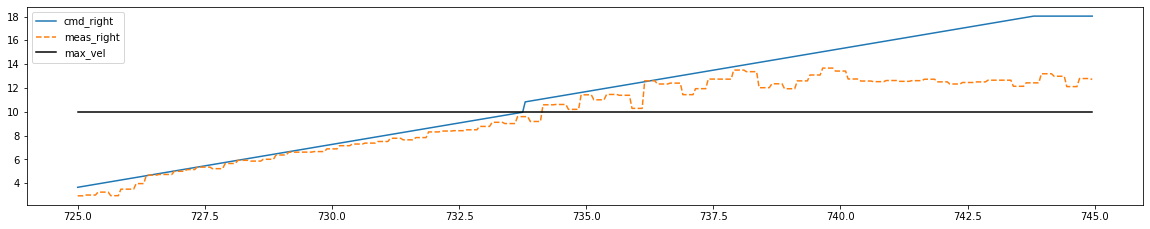

In [29]:
# plot commanded and measured wheel velocities
slice_start = 14500
slice_end = 14900

max_vel = np.full(time_arr.shape[0], 10)

plt.figure(1, figsize=(20,8))
plt.subplot(211)
plt.plot(time_arr[slice_start:slice_end], right_vel_cmd_arr[slice_start:slice_end], c='tab:blue', label='cmd_right')
plt.plot(time_arr[slice_start:slice_end], right_vel_meas_arr[slice_start:slice_end], c='tab:orange', linestyle='dashed', label='meas_right')
plt.plot(time_arr[slice_start:slice_end], max_vel[slice_start:slice_end], c='black', label='max_vel')
plt.legend()

plt.show()

In [151]:
# Create fitted function

# linear_saturated

a = 1
sat_vel = 13

cand_func_lin = np.zeros((right_vel_cmd_arr.shape[0]))
for i in range(cand_func.shape[0]):
    if right_vel_cmd_arr[i] >= sat_vel:
        cand_func_lin[i] = sat_vel
    else:
        cand_func_lin[i] = a * right_vel_cmd_arr[i]
        
# transient response
trans_vel = 11
sat_vel = 13

cand_func_trans = np.zeros((right_vel_cmd_arr.shape[0]))
for i in range(cand_func.shape[0]):
    if right_vel_cmd_arr[i] <= trans_vel:
        cand_func_trans[i] = a * right_vel_cmd_arr[i]
    elif right_vel_cmd_arr[i] > trans_vel and right_vel_cmd_arr[i] <= sat_vel:
        cand_func_trans[i] = sat_vel - np.exp(-0.1*right_vel_cmd_arr[i])
    else:
        cand_func_trans[i] = sat_vel
        


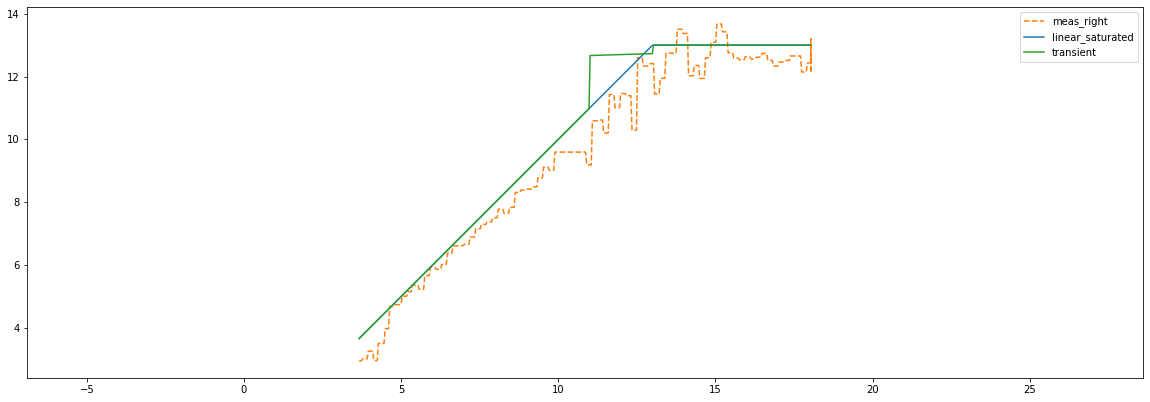

In [152]:
# plot commanded and measured wheel velocities

# max_vel = np.full(time_arr.shape[0], 10)

plt.figure(1, figsize=(20,15))
plt.subplot(211)
plt.plot(right_vel_cmd_arr[slice_start:slice_end], right_vel_meas_arr[slice_start:slice_end], c='tab:orange', linestyle='dashed', label='meas_right')
plt.plot(right_vel_cmd_arr[slice_start:slice_end], cand_func_lin[slice_start:slice_end], c='tab:blue', linestyle='solid', label='linear_saturated')
plt.plot(right_vel_cmd_arr[slice_start:slice_end], cand_func_trans[slice_start:slice_end], c='tab:green', linestyle='solid', label='transient')
plt.axis('equal')
plt.legend()

plt.show()